In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt 
import numpy as np

data = pd.read_excel('all-us-hurricanes-noaa.xls')
data.dtypes

Year                                      object
Month                                     object
States Affected and Category by States    object
Highest                                   object
Central Pressure                          object
Max Wind                                  object
Name                                      object
dtype: object

In [3]:
data.columns =['Year', 'Month', 'States', 'Category', 
             'Pressure', 'Max Wind', 'Name'] 

In [4]:
data = data.replace('Sp-Oc','Sep') #replace two multi-month rows
data = data.replace('Jl-Au','Jul') #replace two multi-month rows

In [5]:
data = data.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False) #drop all rows with NAN values

In [6]:
data = data.astype({'Year': 'int'}) 
data = data.replace('-----',np.NaN)
data = data.astype({'Max Wind': 'float'})

In [7]:
data.Month = pd.to_datetime(data.Month, format='%b').dt.month

In [8]:
data.dtypes

Year          int32
Month         int64
States       object
Category      int64
Pressure      int64
Max Wind    float64
Name         object
dtype: object

In [9]:
#run if needed to get rid of nan in Names column
#data = data.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False) #drop all rows with NAN values

In [10]:
#break out the three metrics: hurricane category, barometric pressure, and maximum wind speeds.
data['Category'].value_counts()

1    122
2     84
3     63
4     28
5      4
Name: Category, dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

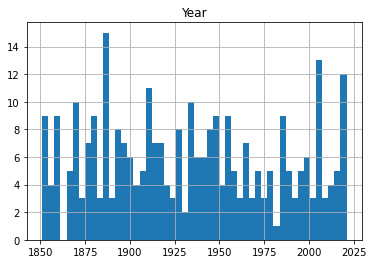

In [19]:
#histogram of whole data set - overview of the number of events (represented on the y-axis) through history
data.hist(column='Year', bins=50) #bins changes the width of bars and may mask/unmask some trends

In [20]:
# to focus on each metric, and plot three separate graphs.
# create three new dataframes and populate each one with the contents of the Year column 
# and the respective data column.

df_category = data[['Year','Category']]
df_wind = data[['Year','Max Wind']]
df_pressure = data[['Year','Pressure']]

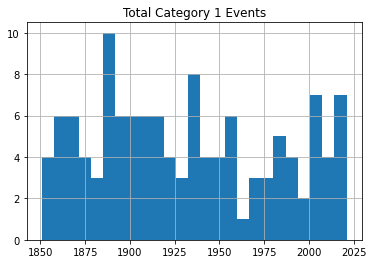

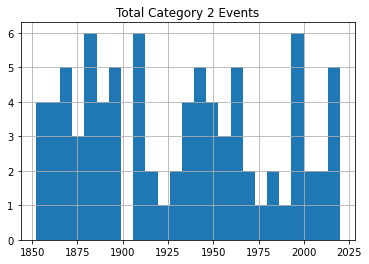

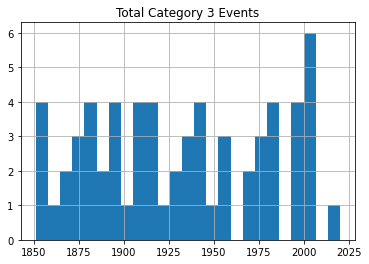

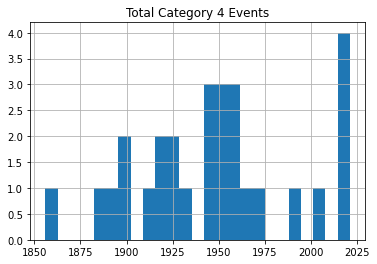

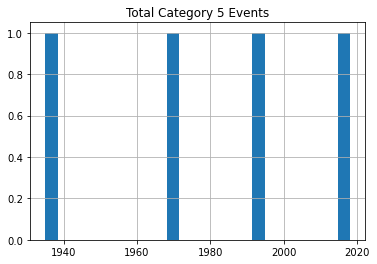

In [24]:
#break data by category into 5 subplots, which presents the frequency of severity of storms

for x in range(1, 5+1): #for loop to itterate through categories 1-5
    cat_num = x
    converted_num = str(cat_num) 
    dfcat = df_category['Category']==(x)
    df1 = df_category[dfcat] #temporary data frame
    df1.hist(column='Year', bins=25)
    plt.title("Total Category " + (converted_num) + " Events")